In [1]:
# Load pytorch modules
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader




# what I learnt:

*   dataloader and torchvision transforms

*   Preloaded vision transforms

# What I could have done better:


*   
*   List item





In [2]:
# split to training and test data
train_data = FashionMNIST(root = 'data/', download = True, train = True, transform = ToTensor())
test_data = FashionMNIST(root = 'data/', download = True, train = False, transform=ToTensor())

100%|██████████| 26.4M/26.4M [00:01<00:00, 21.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 346kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.29MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 17.3MB/s]


In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [4]:
#Wrap in dataloader to split batch size

train_dataloader = DataLoader(train_data, batch_size = 64, shuffle = True, num_workers = 2)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = False,num_workers = 2)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


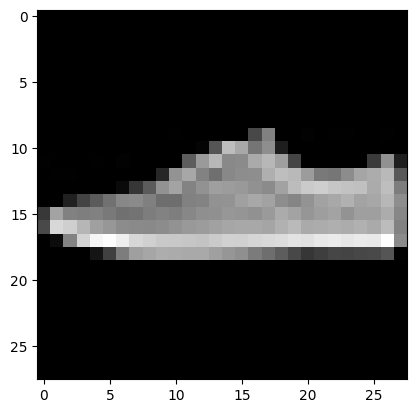

Label: Sneaker


In [5]:
# visualising stuff in the train features
import matplotlib.pyplot as plt
train_data, train_label = next(iter(train_dataloader)) # runs through the iterable dataloader
print(f"Feature batch shape: {train_data.size()}")
print(f"Labels batch shape: {train_label.size()}")
img = train_data[1].squeeze()
label = train_label[1]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label.item()]}")

# what I learnt:
1. next and iter

#what i could do better:
1. look to see whether I can find a modular code for any manual process i can build.

In [6]:
# Build model
# 1. Define model architecture
# 2. Work on working on input flow into the model after designing model architecture.
# 3. work on seeing if there are helper functions

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, padding= 1)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, padding =1)
    self.conv3 = nn.Conv2d(in_channels =12, out_channels = 32, kernel_size=3, padding=1)
    self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
    self.fc1 = nn.LazyLinear(out_features= 1024)
    self.fc2 = nn.LazyLinear(out_features= 10)

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, kernel_size=2, stride=2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, kernel_size=2, stride=2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, kernel_size=2, stride=2)
    x = F.relu(self.conv4(x))
    x = F.max_pool2d(x, kernel_size=2, stride=2)
    x = x.view(x.size(0), -1)
    x = self.fc1(x)
    x = self.fc2(x)

    return x

# what I could have done better:
first pull out the formula for calculating the shape of the pixel arrays.
when designing the architecture.  
pick up a pen and paper and design the architecture and it's part or if using a notion note, just design in there.

# what i learnt:
LazyLinear to avoid calculating input shape

In [7]:
model = CNN()

In [8]:
from torch.optim import Adam
optimizer = Adam(model.parameters(),lr = 0.01)
loss_fn = nn.CrossEntropyLoss()

In [9]:
epochs = 150
train_loss = []
train_acc = []
test_loss = []
test_acc = []
model.train()  # set training mode

for epoch in range(epochs):
    epoch_loss = 0
    epoch_correct = 0
    epoch_total = 0

    for x, y in train_dataloader:
        optimizer.zero_grad()
        y_pred = model(x)                      # call model safely
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()

        # accumulate metrics
        epoch_loss += loss.item() * x.size(0)
        epoch_correct += (y_pred.argmax(1) == y).sum().item()
        epoch_total += x.size(0)

    train_loss.append(epoch_loss / epoch_total)
    train_acc.append(epoch_correct / epoch_total)

    print(f"Epoch {epoch+1}/{epochs} — Loss: {train_loss[-1]:.4f}, Acc: {train_acc[-1]:.4f}")


Epoch 1/150 — Loss: 0.6600, Acc: 0.7552
Epoch 2/150 — Loss: 0.5068, Acc: 0.8167
Epoch 3/150 — Loss: 0.4777, Acc: 0.8252
Epoch 4/150 — Loss: 0.4659, Acc: 0.8292
Epoch 5/150 — Loss: 0.4596, Acc: 0.8305
Epoch 6/150 — Loss: 0.4519, Acc: 0.8355
Epoch 7/150 — Loss: 0.4515, Acc: 0.8358
Epoch 8/150 — Loss: 0.4503, Acc: 0.8360
Epoch 9/150 — Loss: 0.4457, Acc: 0.8384
Epoch 10/150 — Loss: 0.4399, Acc: 0.8387
Epoch 11/150 — Loss: 0.4352, Acc: 0.8403
Epoch 12/150 — Loss: 0.4374, Acc: 0.8404
Epoch 13/150 — Loss: 0.4315, Acc: 0.8423
Epoch 14/150 — Loss: 0.4356, Acc: 0.8409
Epoch 15/150 — Loss: 0.4353, Acc: 0.8435
Epoch 16/150 — Loss: 0.4304, Acc: 0.8422
Epoch 17/150 — Loss: 0.4294, Acc: 0.8438
Epoch 18/150 — Loss: 0.4236, Acc: 0.8451
Epoch 19/150 — Loss: 0.4284, Acc: 0.8454
Epoch 20/150 — Loss: 0.4196, Acc: 0.8470
Epoch 21/150 — Loss: 0.4259, Acc: 0.8454
Epoch 22/150 — Loss: 0.4296, Acc: 0.8453
Epoch 23/150 — Loss: 0.4244, Acc: 0.8456
Epoch 24/150 — Loss: 0.4237, Acc: 0.8463
Epoch 25/150 — Loss: 0.41

In [10]:
model.eval()  # switch to evaluation mode
test_loss = []
test_acc = []
epoch_test_loss = 0
epoch_test_correct = 0
epoch_test_total = 0

with torch.no_grad():  # disable gradient tracking
    for x, y in test_dataloader:
        y_pred = model(x)
        loss = loss_fn(y_pred, y)

        epoch_test_loss += loss.item() * x.size(0)
        epoch_test_correct += (y_pred.argmax(1) == y).sum().item()
        epoch_test_total += x.size(0)

test_loss.append(epoch_test_loss / epoch_test_total)
test_acc.append(epoch_test_correct / epoch_test_total)

print(
    f"Epoch {epoch+1}/{epochs} "
    f"— Train Acc: {train_acc[-1]:.4f} "
    f"| Val Acc: {test_acc[-1]:.4f}"
)

model.train()  # switch back for next epoch


Epoch 150/150 — Train Acc: 0.8547 | Val Acc: 0.8330


CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=64, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [11]:
torch.save(model, 'model.pth')

#what i learnt:
1. calling model.foward(x) directly just pulls out the forward method and doesn't taking into account other stuff built into the model like train and evaluate.
2. Don't assume the way you learnt how to build stuff is the standard way.

# what i could do better:
1. Look for the standard way a framework is used and build adaptations from there.
2. Don't try to adapt with limited knowledge. Recipe for error.